<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/urmu_lab_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных лабораторных работ 1,2,3

### Загружаем библиотеки

In [579]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import math

### Загружаем реальные данные 

Предварительно руками исправили первую строчку в файлах так, чтобы между названиями столбцов был разделитель 2 пробела.

In [580]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [581]:
df1_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab1_brig3_12a.txt", sep='  ', engine='python')
df2_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab2_brig3_12a.txt", sep='  ', engine='python')
df3_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_brigada2.txt", sep='  ', engine='python')
df1_real.head()

,t,omega_1,omega_2,omega_3,omega_4,M1,M2,M3,M4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,-0.0000,0.0000,-0.0000,0.0122,0.1835,-0.1368,-0.3514,-0.0026,0.0002,-0.0002,0.0004,0.0000,-0.0000,0.0000
1,0.2,-0.8309,0.7214,0.9362,-1.0943,-1.4948,1.5883,1.1979,-1.6212,-0.0033,0.0448,-0.0155,-0.0003,0.0045,-0.0015
2,0.3,-1.9333,2.2372,2.2251,-2.4318,-1.5450,1.3797,1.1235,-1.4516,0.0012,0.1103,-0.0158,-0.0002,0.0155,-0.0031
3,0.4,-2.8857,2.9911,3.1167,-3.1532,-1.4723,1.4291,1.0716,-1.4559,0.0009,0.1518,-0.0128,-0.0000,0.0307,-0.0044
4,0.5,-4.2921,3.3599,3.7611,-3.8908,-1.0352,1.5944,1.0093,-1.3442,-0.0133,0.1913,0.0000,-0.0013,0.0498,-0.0044


### Формируем идеальные данные

Функция для нахождения угловых скоростей колёс по заданным скоростям платформы

In [582]:
l = 0.15
h = 0.235
R = 0.05

In [583]:
def get_omega(Vx, Vy, W, l, h, R):
  Vx = np.array(Vx)
  Vy = np.array(Vy)
  W = np.array(W)
  omega1 = (Vx-Vy-(h+l)*W)/R
  omega2 = (Vx+Vy+(h+l)*W)/R
  omega3 = (Vx+Vy-(h+l)*W)/R
  omega4 = (Vx-Vy+(h+l)*W)/R
  return omega1, omega2, omega3, omega4

Функция общего вида для нахождения координат по скоростям

In [584]:
def position(Vx, Vy, W, dt):
  X_sum=0
  Y_sum=0
  Psi_sum=0
  X=[]
  Y=[]
  Psi=[]
  for i in range(len(Vx)):
    X_sum+=(math.cos(Psi_sum)*Vx[i]-math.sin(Psi_sum)*Vy[i])*dt
    Y_sum+=(math.sin(Psi_sum)*Vx[i]+math.cos(Psi_sum)*Vy[i])*dt
    Psi_sum+=W[i]*dt
    X.append(X_sum)
    Y.append(Y_sum)
    Psi.append(Psi_sum)
  return X, Y, Psi

lab1

In [585]:
t=3
v=0.2
dt=0.1
V1x = [0]*int(t/dt)+[v]*int(t/dt)+[0]*int(t/dt)+[-v]*int(t/dt)
V1y = [v]*int(t/dt)+[0]*int(t/dt)+[-v]*int(t/dt)+[0]*int(t/dt)
W1 = [0]*int(4*t/dt)
omega11, omega12, omega13, omega14 = get_omega(V1x, V1y, W1, l, h, R)
X1, Y1, Psi1 = position(V1x, V1y, W1, dt)

In [586]:
df1_ideal = pd.DataFrame({"t": df1_real['t'], "omega_1": omega11, "omega_2": omega12, "omega_3": omega13, "omega_4": omega14, 
                          "Vx_o": V1x, "Vy_o": V1y, "dpsi": W1, "x0": X1, "y0": Y1, "psi": Psi1})
df1_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.02,0.0
1,0.2,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.04,0.0
2,0.3,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.06,0.0
3,0.4,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.08,0.0
4,0.5,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.10,0.0


lab2

In [587]:
t=15
v=-2*math.pi/t
dt=0.1
V2x = [0]*int(t/dt)
V2y = [0]*int(t/dt)
W2 = [v]*int(t/dt)
omega21, omega22, omega23, omega24 = get_omega(V2x, V2y, W2, l, h, R)
X2, Y2, Psi2 = position(V2x, V2y, W2, dt)

In [588]:
df2_ideal = pd.DataFrame({"t": df2_real['t'], "omega_1": omega21, "omega_2": omega22, "omega_3": omega23, "omega_4": omega24, 
                          "Vx_o": V2x, "Vy_o": V2y, "dpsi": W2, "x0": X2, "y0": Y2, "psi": Psi2})
df2_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,3.225368,-3.225368,3.225368,-3.225368,0,0,-0.418879,0.0,0.0,-0.041888
1,0.2,3.225368,-3.225368,3.225368,-3.225368,0,0,-0.418879,0.0,0.0,-0.083776
2,0.3,3.225368,-3.225368,3.225368,-3.225368,0,0,-0.418879,0.0,0.0,-0.125664
3,0.4,3.225368,-3.225368,3.225368,-3.225368,0,0,-0.418879,0.0,0.0,-0.167552
4,0.5,3.225368,-3.225368,3.225368,-3.225368,0,0,-0.418879,0.0,0.0,-0.209440


lab3

In [589]:
v=0.2
t=9.4
w=-0.667
dt=0.1
V3x = [v]*int(t/dt)
V3y = [0]*int(t/dt)
W3 = [w]*int(t/dt)
omega31, omega32, omega33, omega34 = get_omega(V3x, V3y, W3, l, h, R)
X3, Y3, Psi3 = position(V3x, V3y, W3, dt)

In [590]:
df3_ideal = pd.DataFrame({"t": df3_real['t'], "omega_1": omega31, "omega_2": omega32, "omega_3": omega33, "omega_4": omega34, 
                          "Vx_o": V3x, "Vy_o": V3y, "dpsi": W3, "x0": X3, "y0": Y3, "psi": Psi3})
df3_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,9.1359,-1.1359,9.1359,-1.1359,0.2,0,-0.667,0.020000,0.000000,-0.0667
1,0.2,9.1359,-1.1359,9.1359,-1.1359,0.2,0,-0.667,0.039956,-0.001333,-0.1334
2,0.3,9.1359,-1.1359,9.1359,-1.1359,0.2,0,-0.667,0.059778,-0.003993,-0.2001
3,0.4,9.1359,-1.1359,9.1359,-1.1359,0.2,0,-0.667,0.079379,-0.007968,-0.2668
4,0.5,9.1359,-1.1359,9.1359,-1.1359,0.2,0,-0.667,0.098671,-0.013241,-0.3335


### Найдём отклонения

In [591]:
columns_for_difference = ['omega_1', 'omega_2', 'omega_3', 'omega_4', 'Vx_o', 'Vy_o',	'dpsi',	'x0',	'y0',	'psi']

In [592]:
ddf1 = df1_ideal[['t']+columns_for_difference]
ddf1[columns_for_difference] -= df1_real[columns_for_difference]
ddf1.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,-4.0000,4.0000,4.0000,-4.0122,-0.0002,0.2002,-0.0004,0.0000,0.0200,0.0000
1,0.2,-3.1691,3.2786,3.0638,-2.9057,0.0033,0.1552,0.0155,0.0003,0.0355,0.0015
2,0.3,-2.0667,1.7628,1.7749,-1.5682,-0.0012,0.0897,0.0158,0.0002,0.0445,0.0031
3,0.4,-1.1143,1.0089,0.8833,-0.8468,-0.0009,0.0482,0.0128,0.0000,0.0493,0.0044
4,0.5,0.2921,0.6401,0.2389,-0.1092,0.0133,0.0087,0.0000,0.0013,0.0502,0.0044


In [593]:
ddf2 = df2_ideal[['t']+columns_for_difference]
ddf2[columns_for_difference] -= df2_real[columns_for_difference]
ddf2.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,3.225368,-3.225368,3.225368,-3.229468,-0.0001,0.0001,-0.418979,0.0000,0.0000,-0.041888
1,0.2,1.413668,-1.413668,1.632568,-1.737968,-0.0013,0.0068,-0.201279,-0.0001,0.0007,-0.061976
2,0.3,0.485568,-0.684168,0.915168,-1.190768,-0.0059,0.0117,-0.106379,-0.0007,0.0019,-0.072664
3,0.4,0.258568,-0.234268,0.059968,-0.234268,-0.0019,-0.0025,-0.025579,-0.0009,0.0016,-0.075252
4,0.5,0.072168,-0.222168,0.258568,-0.120768,-0.0002,0.0011,-0.021879,-0.0009,0.0017,-0.077440


In [594]:
ddf3 = df3_ideal[['t']+columns_for_difference]
ddf3[columns_for_difference] -= df3_real[columns_for_difference]
ddf3.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,9.1359,-1.1481,9.1400,-1.1359,0.1999,-0.0001,-0.6675,0.020000,0.000000,-0.0668
1,0.2,5.9260,-1.0711,5.3140,-0.5888,0.1198,-0.0137,-0.4188,0.031956,-0.002733,-0.1086
2,0.3,2.4445,-1.0711,2.4729,-0.2807,0.0446,-0.0095,-0.2035,0.036178,-0.005893,-0.1290
3,0.4,0.3653,-0.5644,-0.1778,-0.0497,-0.0053,-0.0132,-0.0260,0.035179,-0.009768,-0.1316
4,0.5,-1.1019,-0.3902,-1.8922,0.1165,-0.0408,-0.0162,0.0883,0.030371,-0.013441,-0.1228


### Найдём время запаздывания и восстановим координаты

In [595]:
def integral(V, dt):
  Integral_V=[]
  sum=0
  for v in V:
    sum+=v*dt
    Integral_V.append(sum)
  return np.array(Integral_V)

In [596]:
def get_v(df_ideal, df_real, ddf, dt):
  B = np.concatenate((ddf['x0'].values-integral(ddf['Vx_o'], dt), 
                    ddf['y0'].values-integral(ddf['Vy_o'], dt), 
                    ddf['psi'].values-integral(ddf['dpsi'], dt)))
  A = np.concatenate((df_ideal['Vx_o'].values, 
                     df_ideal['Vy_o'].values, 
                     df_ideal['dpsi'].values))
  dtzap = (1/(A.T@A))*(A.T@B)
  df_v = df_ideal[['t']].copy()
  df_v['x0'] = (df_real['x0'].values + 
                df_ideal['Vx_o'].values*dtzap + integral(ddf['Vx_o'], dt))
  df_v['y0'] = (df_real['y0'].values + 
                df_ideal['Vy_o'].values*dtzap + integral(ddf['Vy_o'], dt))
  df_v['psi'] = (df_real['psi'].values + 
                 df_ideal['dpsi'].values*dtzap + integral(ddf['dpsi'], dt))
  ddf_iv = df_ideal[['t']].copy()
  ddf_iv['x0'] = df_ideal['x0'] - df_v['x0']
  ddf_iv['y0'] = df_ideal['y0'] - df_v['y0']
  ddf_iv['psi'] = df_ideal['psi'] - df_v['psi']
  return dtzap, df_v, ddf_iv

In [597]:
dtzap1, df1_v, ddf1_iv = get_v(df1_ideal, df1_real, ddf1, dt)
print("Время запаздывания: ", dtzap1)
print("Восстановленные координаты: \n", df1_v.head())
print("Разность идеальных и восстановленных координаты: \n", ddf1_iv.head())

Время запаздывания:  -0.012185833333333295
Восстановленные координаты: 
      t       x0        y0      psi
0  0.1 -0.00002  0.017583 -0.00004
1  0.2  0.00001  0.037603  0.00001
2  0.3 -0.00001  0.057573 -0.00001
3  0.4  0.00010  0.077593 -0.00003
4  0.5  0.00013  0.097563 -0.00003
Разность идеальных и восстановленных координаты: 
      t       x0        y0      psi
0  0.1  0.00002  0.002417  0.00004
1  0.2 -0.00001  0.002397 -0.00001
2  0.3  0.00001  0.002427  0.00001
3  0.4 -0.00010  0.002407  0.00003
4  0.5 -0.00013  0.002437  0.00003


In [598]:
dtzap2, df2_v, ddf2_iv = get_v(df2_ideal, df2_real, ddf2, dt)
print("Время запаздывания: ", dtzap2)
print("Восстановленные координаты: \n", df2_v.head())
print("Разность идеальных и восстановленных координаты: \n", ddf2_iv.head())

Время запаздывания:  -1.591549421796309e-06
Восстановленные координаты: 
      t       x0       y0       psi
0  0.1 -0.00001  0.00001 -0.041897
1  0.2 -0.00004 -0.00001 -0.083825
2  0.3 -0.00003 -0.00004 -0.125663
3  0.4 -0.00002  0.00001 -0.167521
4  0.5 -0.00004  0.00002 -0.209409
Разность идеальных и восстановленных координаты: 
      t       x0       y0           psi
0  0.1  0.00001 -0.00001  9.333333e-06
1  0.2  0.00004  0.00001  4.933333e-05
2  0.3  0.00003  0.00004 -6.666667e-07
3  0.4  0.00002 -0.00001 -3.066667e-05
4  0.5  0.00004 -0.00002 -3.066667e-05


In [599]:
dtzap3, df3_v, ddf3_iv = get_v(df3_ideal, df3_real, ddf3, dt)
print("Время запаздывания: ", dtzap3)
print("Восстановленные координаты: \n", df3_v.head())
print("Разность идеальных и восстановленных координаты: \n", ddf3_iv.head())

Время запаздывания:  0.012069613234183303
Восстановленные координаты: 
      t        x0       y0      psi
0  0.1  0.022404 -0.00001 -0.07470
1  0.2  0.042384  0.00002 -0.14148
2  0.3  0.062444 -0.00043 -0.20813
3  0.4  0.082514 -0.00185 -0.27483
4  0.5  0.102534 -0.00507 -0.34150
Разность идеальных и восстановленных координаты: 
      t        x0        y0      psi
0  0.1 -0.002404  0.000010  0.00800
1  0.2 -0.002428 -0.001353  0.00808
2  0.3 -0.002666 -0.003563  0.00803
3  0.4 -0.003135 -0.006118  0.00803
4  0.5 -0.003863 -0.008171  0.00800


### Сравним визуально траектории

lab1

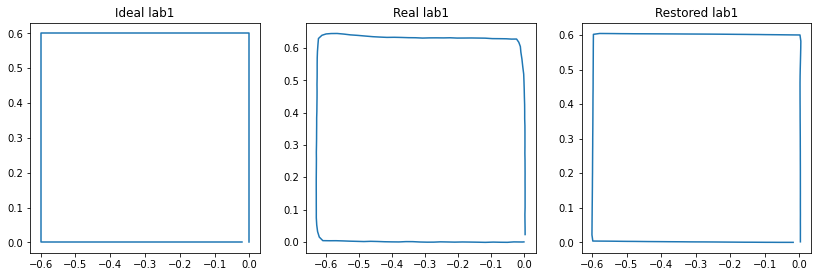

In [600]:
fig, ax = plt.subplots(ncols=3)
ax1, ax2, ax3 = ax.flatten()

ax1.plot(-df1_ideal['y0'], df1_ideal['x0'])
ax1.set_title("Ideal lab1")
ratio = 1.0
xleft, xright = ax1.get_xlim()
ybottom, ytop = ax1.get_ylim()
ax1.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax2.plot(-df1_real['y0'], df1_real['x0'])
ax2.set_title("Real lab1")
ratio = 1.0
xleft, xright = ax2.get_xlim()
ybottom, ytop = ax2.get_ylim()
ax2.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax3.plot(-df1_v['y0'], df1_v['x0'])
ax3.set_title("Restored lab1")
ratio = 1.0
xleft, xright = ax3.get_xlim()
ybottom, ytop = ax3.get_ylim()
ax3.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

fig.set_size_inches(14, 6)

lab3

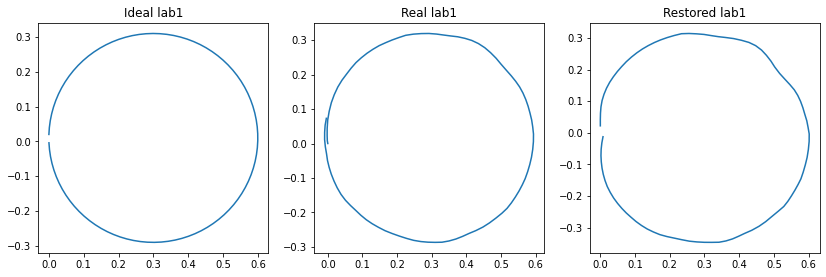

In [601]:
fig, ax = plt.subplots(ncols=3)
ax1, ax2, ax3 = ax.flatten()

ax1.plot(-df3_ideal['y0'], df3_ideal['x0'])
ax1.set_title("Ideal lab1")
ratio = 1.0
xleft, xright = ax1.get_xlim()
ybottom, ytop = ax1.get_ylim()
ax1.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax2.plot(-df3_real['y0'], df3_real['x0'])
ax2.set_title("Real lab1")
ratio = 1.0
xleft, xright = ax2.get_xlim()
ybottom, ytop = ax2.get_ylim()
ax2.set_aspect(abs((xright-xleft)/(ybottom-ytop)))

ax3.plot(-df3_v['y0'], df3_v['x0'])
ax3.set_title("Restored lab1")
ratio = 1.0
xleft, xright = ax3.get_xlim()
ybottom, ytop = ax3.get_ylim()
ax3.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

fig.set_size_inches(14, 6)

### Найдём СКО и мат. ожидание для разниц идеальных координат с реальными и восстановленными и разниц идеальных скоростей с реальными

In [602]:
def math_e(series):
  return series.sum()/len(series)

In [603]:
def s_dev(series, Math_e):
  return (sum((series - Math_e)**2)/len(series))**(1/2)

In [604]:
def get_table_Math_SKO(ddf, ddf_iv):
  df_math_sko = pd.DataFrame({ 
     'omega_1': [math_e(abs(ddf['omega_1'])),
           s_dev(ddf['omega_1'], math_e(ddf['omega_1'])),
           " - ",
           " - "], 
     'omega_2': [math_e(abs(ddf['omega_2'])),
           s_dev(ddf['omega_2'], math_e(ddf['omega_2'])),
           " - ",
           " - "],
     'omega_3': [math_e(abs(ddf['omega_3'])),
           s_dev(ddf['omega_3'], math_e(ddf['omega_3'])),
           " - ",
           " - "], 
     'omega_4': [math_e(abs(ddf['omega_4'])),
           s_dev(ddf['omega_4'], math_e(ddf['omega_4'])),
           " - ",
           " - "], 
     'Vx': [math_e(abs(ddf['Vx_o'])),
           s_dev(ddf['Vx_o'], math_e(ddf['Vx_o'])),
           " - ",
           " - "],
     'Vy': [math_e(abs(ddf['Vy_o'])),
           s_dev(ddf['Vy_o'], math_e(ddf['Vy_o'])),
           " - ",
           " - "],
     'dpsi': [math_e(abs(ddf['dpsi'])),
           s_dev(ddf['dpsi'], math_e(ddf['dpsi'])),
           " - ",
           " - "],
     'X': [math_e(abs(ddf['x0'])),
           s_dev(ddf['x0'], math_e(ddf['x0'])),
           math_e(abs(ddf_iv['x0'])),
           s_dev(ddf_iv['x0'], math_e(ddf_iv['x0']))], 
     'Y': [math_e(abs(ddf['y0'])),
           s_dev(ddf['y0'], math_e(ddf['y0'])),
           math_e(abs(ddf_iv['y0'])),
           s_dev(ddf_iv['y0'], math_e(ddf_iv['y0']))], 
     'Psi': [math_e(abs(ddf['psi'])),
           s_dev(ddf['psi'], math_e(ddf['psi'])),
           math_e(abs(ddf_iv['psi'])),
           s_dev(ddf_iv['psi'], math_e(ddf_iv['psi']))]},
      index=["Math_ir", "SKO_ir", "Math_iv", "SKO_iv"])
  return df_math_sko

In [605]:
print("Лаб. 1")
print("Время запаздывания: ", dtzap1)
print("Мат. ожидание и CКО: ")
df_math_sko_1 = get_table_Math_SKO(ddf1, ddf1_iv)
df_math_sko_1

Лаб. 1
Время запаздывания:  -0.012185833333333295
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,0.608522,0.557384,0.576774,0.590722,0.018552,0.021504,0.011564,0.021547,0.026748,0.006975
SKO_ir,1.330214,1.062753,1.101175,1.268688,0.038795,0.044219,0.021456,0.022075,0.029921,0.006181
Math_iv,-,-,-,-,-,-,-,0.001808,0.002487,0.000033
SKO_iv,-,-,-,-,-,-,-,0.000909,0.000762,0.000031


In [606]:
print("Лаб. 2")
print("Время запаздывания: ", dtzap2)
print("Мат. ожидание и CКО: ")
df_math_sko_2 = get_table_Math_SKO(ddf2, ddf2_iv)
df_math_sko_2

Лаб. 2
Время запаздывания:  -1.591549421796309e-06
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,0.320685,0.271236,0.231974,0.26224,0.004318,0.004601,0.031005,0.001511,0.003015,0.113683
SKO_ir,0.449473,0.377798,0.359474,0.408691,0.005288,0.005676,0.045855,0.001856,0.003633,0.096105
Math_iv,-,-,-,-,-,-,-,0.001940,0.006434,0.000027
SKO_iv,-,-,-,-,-,-,-,0.001721,0.006636,0.000032


In [607]:
print("Лаб. 3")
print("Время запаздывания: ", dtzap3)
print("Мат. ожидание и CКО: ")
df_math_sko_3 = get_table_Math_SKO(ddf3, ddf3_iv)
df_math_sko_3

Лаб. 3
Время запаздывания:  0.012069613234183303
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,0.803955,0.324153,0.782188,0.169783,0.017159,0.007965,0.057072,0.022592,0.022545,0.112620
SKO_ir,1.350572,0.411475,1.279298,0.232841,0.028899,0.010183,0.094604,0.029897,0.019879,0.104584
Math_iv,-,-,-,-,-,-,-,0.030089,0.017356,0.008056
SKO_iv,-,-,-,-,-,-,-,0.028326,0.019085,0.000031


### Дисперсия, мат. ожидание и CКО для разности идеальных и реальных скоростей Vx, Vy, Om

lab1

In [608]:
df_table_1 = df_math_sko_1[['Vx', 'Vy', 'dpsi']].head(2)
df_table_1.loc['Disper_ir'] = df_table_1.values[1]**2
df_table_1.head()

,Vx,Vy,dpsi
Math_ir,0.018552,0.021504,0.011564
SKO_ir,0.038795,0.044219,0.021456
Disper_ir,0.001505,0.001955,0.00046


lab2

In [609]:
df_table_2 = df_math_sko_2[['Vx', 'Vy', 'dpsi']].head(2)
df_table_2.loc['Disper_ir'] = df_table_2.values[1]**2
df_table_2.head()

,Vx,Vy,dpsi
Math_ir,0.004318,0.004601,0.031005
SKO_ir,0.005288,0.005676,0.045855
Disper_ir,0.000028,0.000032,0.002103


lab3

In [610]:
df_table_3 = df_math_sko_3[['Vx', 'Vy', 'dpsi']].head(2)
df_table_3.loc['Disper_ir'] = df_table_3.values[1]**2
df_table_3.head()

,Vx,Vy,dpsi
Math_ir,0.017159,0.007965,0.057072
SKO_ir,0.028899,0.010183,0.094604
Disper_ir,0.000835,0.000104,0.00895


### Мат. ожидание и CКО для разности идеальных и реальных координат X, Y, Psi

lab1

In [611]:
df_math_sko_1[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,0.001808,0.002487,0.000033
SKO_iv,0.000909,0.000762,0.000031


lab2

In [612]:
df_math_sko_2[['X', 'Y', 'Psi']].head(2)

,X,Y,Psi
Math_ir,0.001511,0.003015,0.113683
SKO_ir,0.001856,0.003633,0.096105


lab3

In [613]:
df_math_sko_3[['X', 'Y', 'Psi']].head(2)

,X,Y,Psi
Math_ir,0.022592,0.022545,0.112620
SKO_ir,0.029897,0.019879,0.104584


### Мат. ожидание и CКО для разности идеальных и восстановленных координат X, Y, Psi

lab1

In [614]:
df_math_sko_1[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,0.001808,0.002487,0.000033
SKO_iv,0.000909,0.000762,0.000031


lab2

In [615]:
df_math_sko_2[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,0.001940,0.006434,0.000027
SKO_iv,0.001721,0.006636,0.000032


lab3

In [616]:
df_math_sko_3[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,0.030089,0.017356,0.008056
SKO_iv,0.028326,0.019085,0.000031


### Во сколько раз улучшились параметры распределения при учёте расмотренной модели ошибок

lab1

In [617]:
pd.DataFrame(df_math_sko_1[['X', 'Y', 'Psi']].values[0:2] / df_math_sko_1[['X', 'Y', 'Psi']].values[2:4], 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,11.920151,10.756702,213.520408
SKO,24.294913,39.274392,196.606291


lab2

In [618]:
pd.DataFrame(df_math_sko_2[['X', 'Y', 'Psi']].values[0:2] / df_math_sko_2[['X', 'Y', 'Psi']].values[2:4], 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,0.778882,0.468622,4247.546685
SKO,1.078274,0.547473,2971.226063


lab3

In [619]:
pd.DataFrame(df_math_sko_3[['X', 'Y', 'Psi']].values[0:2] / df_math_sko_3[['X', 'Y', 'Psi']].values[2:4], 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,0.750844,1.299020,13.979731
SKO,1.055463,1.041558,3385.130827
